In [1]:
# importing python libraries NumPy, pandas, Matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Connecting google drive with colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# to read the datafile(in csv format) and import 'DATE' Column into pandas dataframe as Datetime object
df = pd.read_csv('/content/gdrive/My Drive/Datasets/EnergyProduction.csv', parse_dates = ['DATE'], index_col = 'DATE')

In [4]:
# to show/print the given dataframe
df

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321
...,...
1989-08-01,75.2704
1989-09-01,69.5107
1989-10-01,66.0620


In [ ]:
# To find the information of the dataframe 
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1970-01-01 to 1989-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EnergyIndex  240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [ ]:
# to print the rows from the start and the end
print('Rows from the start\n', df.head())
print('\n\nRows from the end\n', df.tail())

Rows from the start
             EnergyIndex
DATE                   
1970-01-01      43.0869
1970-02-01      42.5577
1970-03-01      41.6215
1970-04-01      40.1982
1970-05-01      39.9321


Rows from the end
             EnergyIndex
DATE                   
1989-08-01      75.2704
1989-09-01      69.5107
1989-10-01      66.0620
1989-11-01      69.2555
1989-12-01      84.4040


In [5]:
deep_df = df.copy(deep = True)

In [6]:
# Extracting year and month from date and adding as a new column
df1 = df
df1['Year'] = df.index.year
df1['Month'] = df.index.month
df1.head()

,EnergyIndex,Year,Month
DATE,,,
1970-01-01,43.0869,1970,1
1970-02-01,42.5577,1970,2
1970-03-01,41.6215,1970,3
1970-04-01,40.1982,1970,4
1970-05-01,39.9321,1970,5


In [ ]:
# Description of the dataframe 
df['EnergyIndex'].describe()

count    240.000000
mean      56.502198
std        9.043582
min       39.932100
25%       49.799000
50%       55.607250
75%       62.656200
max       84.404000
Name: EnergyIndex, dtype: float64

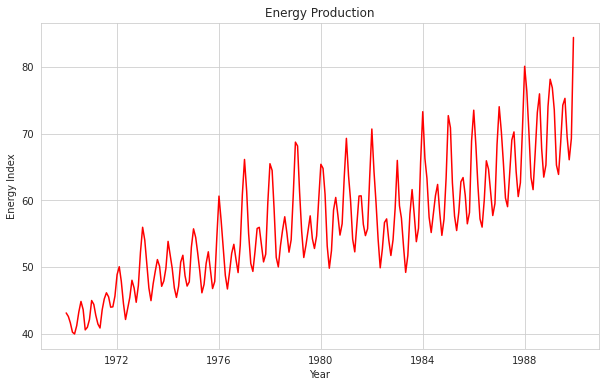

In [7]:
# plotting Energy Index w.r.t their corresponding date
sns.set_style('whitegrid')
fig = plt.figure(figsize=(10,6))
plt.plot(df.index, df['EnergyIndex'], color = 'r')
plt.xlabel('Year'), plt.ylabel('Energy Index'), plt.title('Energy Production')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/ei_yearly.png', dpi = 600)

(Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Energy Index'),
 Text(0.5, 1.0, 'Energy Production'))

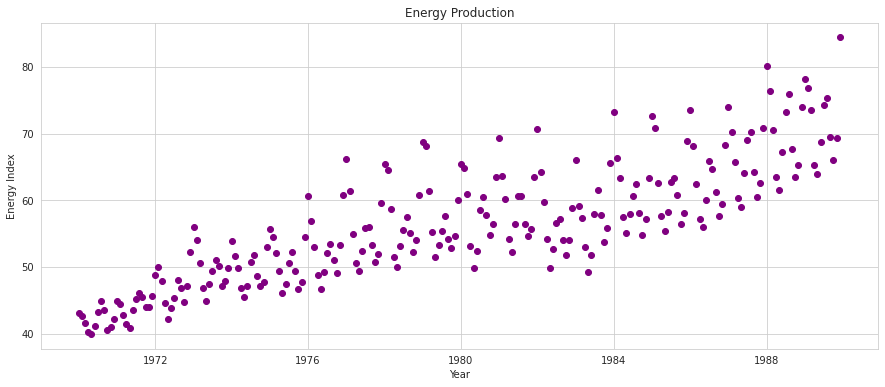

In [ ]:
#scatterplot using matplotlib
plt.figure(figsize=(15,6))
plt.scatter(df.index, df['EnergyIndex'], color = 'purple')
plt.xlabel('Year'), plt.ylabel('Energy Index'), plt.title('Energy Production')

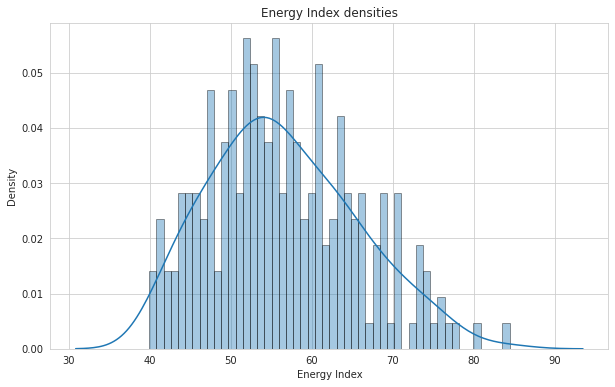

In [8]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df['EnergyIndex'], bins = 50, hist_kws = {'edgecolor':'black'})
plt.title('Energy Index densities'), plt.xlabel('Energy Index'), plt.ylabel('Density')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/ei_density.png', dpi = 600)

In [ ]:
#To find maximum value of Energy Index
max = df['EnergyIndex'].max()
max

84.404

In [ ]:
#To find minimum value of Energy Index
min = df['EnergyIndex'].min()
min

39.9321

In [ ]:
#To find unique values of Energy Index
df['EnergyIndex'].unique()

array([43.0869, 42.5577, 41.6215, 40.1982, 39.9321, 41.1847, 43.223 ,
       44.8138, 43.6007, 40.5467, 40.9385, 42.1117, 44.9517, 44.3696,
       42.7548, 41.4234, 40.8295, 43.5488, 45.1876, 46.1091, 45.505 ,
       43.9496, 44.003 , 45.6054, 48.8392, 50.0191, 47.8421, 44.5127,
       42.1061, 43.8217, 45.3964, 47.9891, 46.8293, 44.6882, 47.1979,
       52.176 , 55.9342, 53.9974, 50.5102, 46.8192, 44.9288, 47.4589,
       49.3168, 51.091 , 50.0826, 47.0794, 47.8829, 49.7968, 53.8211,
       51.6562, 49.7984, 46.8319, 45.4161, 47.1087, 50.7056, 51.7371,
       48.6743, 47.1173, 47.7516, 52.9378, 55.6989, 54.4115, 52.1395,
       49.3369, 46.1066, 47.3769, 50.5251, 52.2585, 49.432 , 46.7476,
       47.7981, 54.4112, 60.612 , 56.9337, 52.9187, 48.7185, 46.6811,
       49.2486, 52.022 , 53.3791, 51.1014, 49.1373, 53.2579, 60.8207,
       66.1065, 61.3553, 54.9875, 50.5114, 49.3163, 52.3147, 55.7601,
       55.929 , 53.2255, 50.7423, 51.8983, 59.5842, 65.4681, 64.4632,
       58.7322, 51.4

In [ ]:
#To find the count of each values
df['EnergyIndex'].value_counts()

55.6989    1
56.3729    1
53.3791    1
51.6562    1
74.0173    1
          ..
76.3631    1
55.2722    1
56.4616    1
63.4244    1
54.0000    1
Name: EnergyIndex, Length: 240, dtype: int64

In [ ]:
#To find the number of rows and columns of the dataframe
df.shape

(240, 1)

In [ ]:
# To create a new dataframe with year included in another column and the mean energy index of each year
df2 = deep_df.resample(rule = 'A').mean()
df2

,EnergyIndex
DATE,
1970-12-31,41.984625
1971-12-31,44.019792
1972-12-31,46.784817
1973-12-31,49.574850
1974-12-31,49.463008
1975-12-31,50.520233
1976-12-31,52.902583
1977-12-31,55.144258
1978-12-31,56.530475


(Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Energy Index'),
 Text(0.5, 1.0, 'Energy Production'))

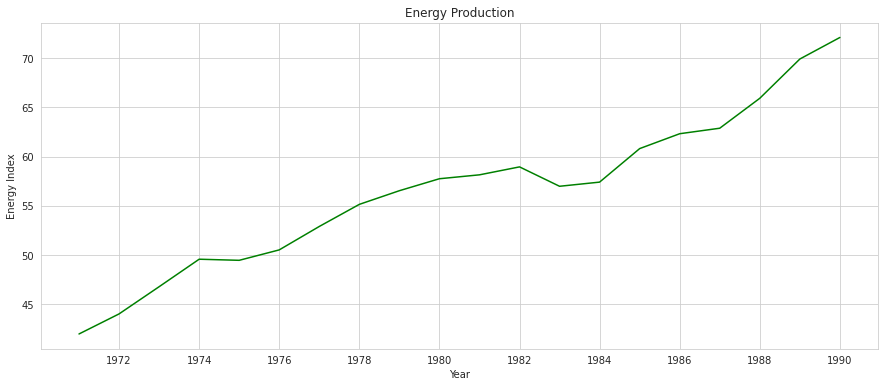

In [ ]:
#Mean Energy Index - Year plot
plt.figure(figsize=(15,6))
plt.plot(df2['EnergyIndex'], 'g')
plt.xlabel('Year'), plt.ylabel('Energy Index'), plt.title('Energy Production')

In [ ]:
# correlation of the columns
df1.corr()

,EnergyIndex,Year,Month
EnergyIndex,1.000000,0.842676,-0.1277
Year,0.842676,1.000000,0.0000
Month,-0.127700,0.000000,1.0000


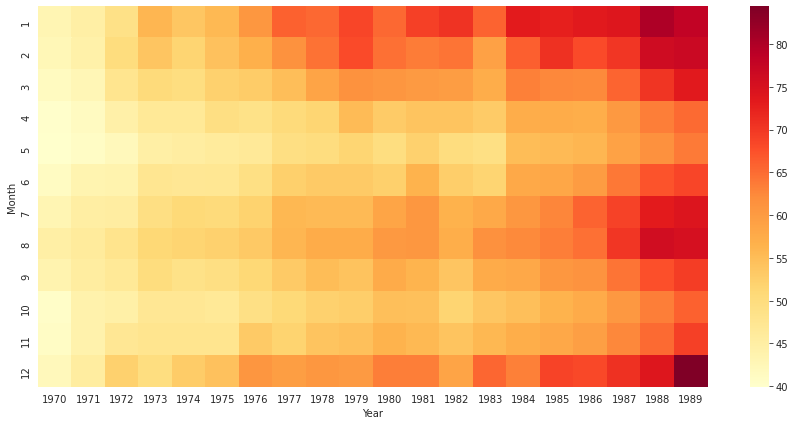

In [11]:
#Heatmap plotting
fig = plt.figure(figsize = (15,7))
df3 = df1.pivot('Month','Year','EnergyIndex')
ax = sns.heatmap(df3, cmap = 'YlOrRd')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/ei_heatmap.png', dpi = 600)

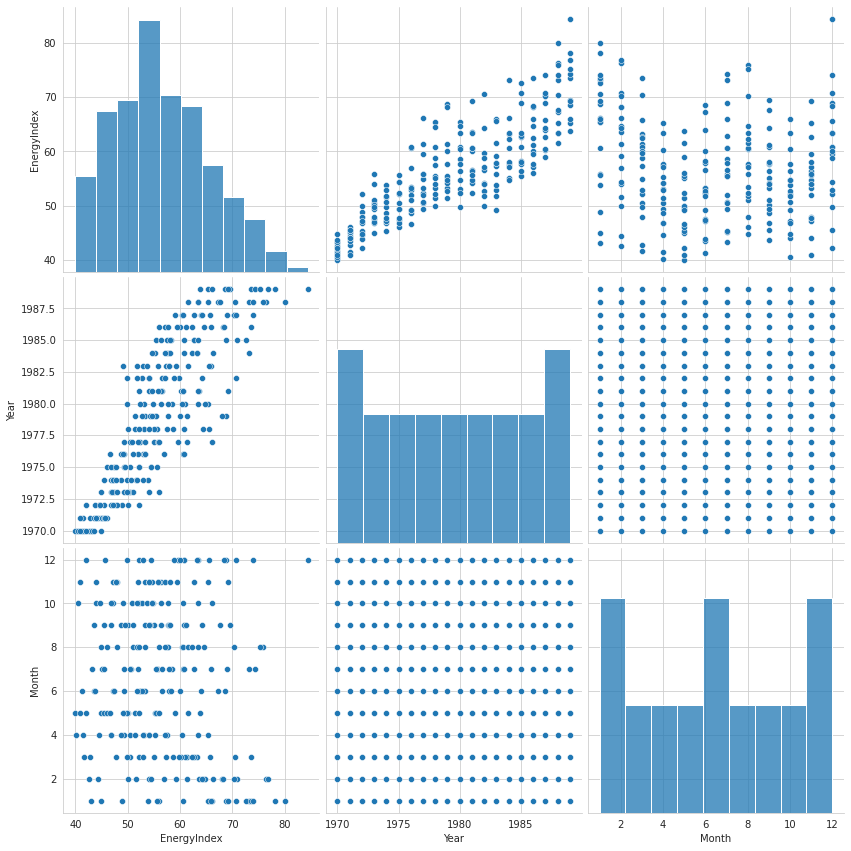

In [ ]:
#Pairplot using seaborn
sns.pairplot(df1, size = 4)

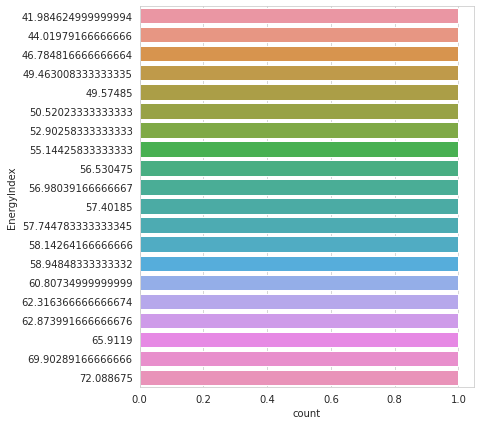

In [ ]:
# countplot using seaborn
plt.figure(figsize = (6,7))
sns.countplot(y='EnergyIndex',data = df1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1970-01-01 to 1989-12-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EnergyIndex  240 non-null    float64
 1   Year         240 non-null    int64  
 2   Month        240 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 17.5 KB


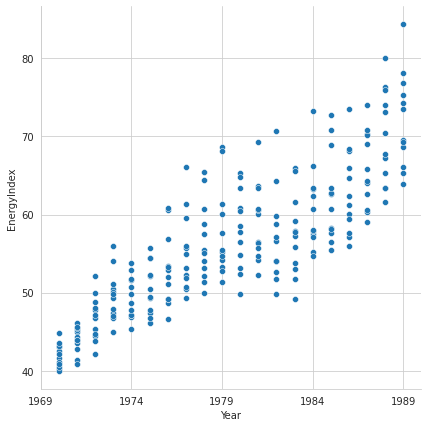

In [ ]:
# Scatter plot of Year vs Energy Index
sns.pairplot(df1, x_vars = 'Year', y_vars='EnergyIndex', size = 6, kind = 'scatter')
plt.xticks(np.arange(1969, 1990, 5.0))
plt.show()

In [13]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1['Year'], df1['EnergyIndex'], train_size = 0.8, test_size = 0.2, random_state = 100)

X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)
X_train_poly[0:5]

array([[1.00000000e+00, 1.97300000e+03, 3.89272900e+06, 7.68035432e+09,
        1.51533391e+13],
       [1.00000000e+00, 1.98000000e+03, 3.92040000e+06, 7.76239200e+09,
        1.53695362e+13],
       [1.00000000e+00, 1.98400000e+03, 3.93625600e+06, 7.80953190e+09,
        1.54941113e+13],
       [1.00000000e+00, 1.98700000e+03, 3.94816900e+06, 7.84501180e+09,
        1.55880385e+13],
       [1.00000000e+00, 1.97400000e+03, 3.89667600e+06, 7.69203842e+09,
        1.51840838e+13]])

In [15]:
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
X_train.head()

,Year
DATE,
1973-07-01,1973
1980-01-01,1980
1984-02-01,1984
1987-05-01,1987
1974-01-01,1974


In [ ]:
y_train.head()

,EnergyIndex
DATE,
1973-07-01,49.3168
1980-01-01,65.3810
1984-02-01,66.2545
1987-05-01,59.0245
1974-01-01,53.8211


In [17]:
b = lr_poly.coef_

b0 = lr_poly.intercept_

print('Coefficients:', b)
print('Intercept:', b0)

Coefficients: [ 0.00000000e+00  1.80606549e-02  2.36846957e+01 -1.59525099e-02
  3.02194568e-06]
Intercept: -15469728.101399207


In [19]:
predicted_data = lr_poly.predict(X_test_poly)
predicted_data[0:5]

array([56.24240059, 58.93008517, 66.37878747, 57.98183088, 64.36746323])

In [28]:
X_axis = np.arange(1969, 1990, 0.5)

y_axis = b0 + b[1] * X_axis + b[2] * (X_axis ** 2) + b[3] * (X_axis ** 3) + b[4] * (X_axis ** 4)

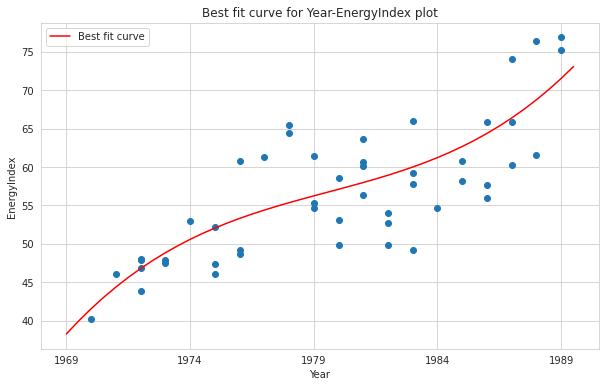

In [33]:
fig = plt.figure(figsize = (10,6))
plt.scatter(X_test, y_test)
plt.plot(X_axis, y_axis, 'r')
plt.xticks(np.arange(1969, 1990, 5.0))
plt.title('Best fit curve for Year-EnergyIndex plot')
plt.xlabel('Year'), plt.ylabel('EnergyIndex')
plt.legend(['Best fit curve'])
plt.show()
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/ei_bfc.png', dpi = 600)

In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predicted_data)
print('R squared value: ', r2)

R squared value:  0.6362088152370249
